In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import KFold

In [29]:
train_df=pd.read_csv(r'E:\Semester 5\IME692A- Advanced Statistical Methods for Business Analytics\Project\train.csv')
test_df=pd.read_csv(r'E:\Semester 5\IME692A- Advanced Statistical Methods for Business Analytics\Project\test.csv')
NFOLD = 5

In [37]:
train_df=train_df.values
test_df=test_df.values

In [30]:
kf = KFold(n_splits=NFOLD ,shuffle=True, random_state=42)

In [43]:
preds = np.zeros(test_df.shape[0])

for fold, (tr_idx, val_idx) in enumerate(kf.split(train_df)):
    print(f'FOLD {fold}')
    
    tr = train_df[:,0:-2][tr_idx]
    tr_labels = train_df[:,-1][tr_idx]

    val = train_df[:,0:-2][val_idx]
    val_labels = train_df[:,-1][val_idx]

    xgb_clf=xgb.XGBClassifier()
    xgb_clf.fit(tr, tr_labels)

    val_pred = xgb_clf.predict(val)
    print("Train Accuracy:",metrics.accuracy_score(val_labels, val_pred))

    X_test=test_df[:,0:-2]

    y_pred = xgb_clf.predict(X_test)

    preds += y_pred / NFOLD

FOLD 0
Train Accuracy: 0.7
FOLD 1
Train Accuracy: 0.725
FOLD 2
Train Accuracy: 0.725
FOLD 3
Train Accuracy: 0.7
FOLD 4
Train Accuracy: 0.775


In [49]:
y_test=test_df[:,-1]
y_pred = np.array(list(map(np.round,preds)))

print("Test Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Misclassification error:",1-metrics.accuracy_score(y_test,y_pred))

Test Accuracy: 0.781
Misclassification error: 0.21899999999999997


### Feature Importances

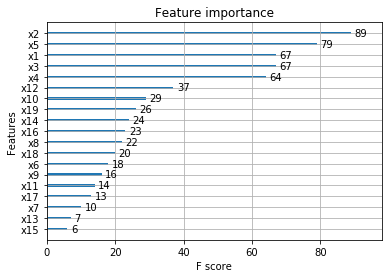

In [14]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Evaluation of Model

In [45]:
from sklearn.metrics import roc_curve, auc

In [46]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

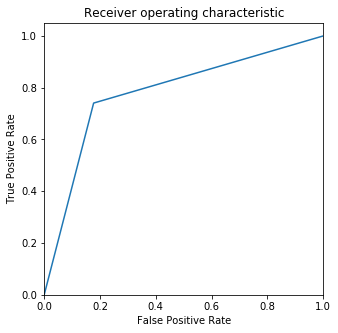

Area under curve: 0.781739283527863


In [47]:
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("Area under curve:",roc_auc[1])